# Challenge 1

Identify tipping points in the CLASS model data. 

Here we demonstrate how to access NOC's global ocean hindcast data on a 0.25 degree resolution grid. Once familar with the data, have a probe of the variables and see if you can identify any forms of tipping points.
___

The first step is to import the relevant modules

In [1]:
import xarray as xr # xarray for accessing and manipulating data

Let's access the data

First we asign the paths, defining where the data is stored

In [2]:
path = "/gws/pw/j07/workshop/ARIA_src_data/"
t_path = path + "VERIFY_eORCA025_MED_UKESM_19900101_20710101_grid_T.nc"

Now we **access** the data

In [3]:
ds = xr.open_dataset(t_path)

In [4]:
ds # we can inpect the whole dataset

<xarray.Dataset> Size: 6GB
Dimensions:               (time_counter: 972, y: 400, x: 400, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 640kB ...
    nav_lon               (y, x) float32 640kB ...
    time_centered         (time_counter) object 8kB ...
  * time_counter          (time_counter) object 8kB 1990-01-16 00:00:00 ... 2...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    mldr10_1              (time_counter, y, x) float32 622MB ...
    qns_oce               (time_counter, y, x) float32 622MB ...
    qsr_oce               (time_counter, y, x) float32 622MB ...
    sbt                   (time_counter, y, x) float32 622MB ...
    sos                   (time_counter, y, x) float32 622MB ...
    taum                  (time_counter, y, x) float32 622MB ...
    time_centered_bounds  (time_counter, axis_nbounds) object 16kB ...
    time_counter_bounds   (time_counter, axis_nbounds) object 16kB ...
    tos                   (time_counter, y, x) float32 622MB ...
    wfo                   (time_counter, y, x) float32 622MB ...
    zos                   (time_counter, y, x) float32 622MB ...
Attributes: (12/14)
    name:         MEANS_OUT/eORCA025_MED_UKESM_1m_19900101_19921230_grid_T
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Nov-06 06:11:48 GMT
    uuid:         89941c43-5b52-4f24-8d21-fff8d0897b4c
    ...           ...
    jbegin:       0
    nj:           76
    file_name:    eORCA025_MED_UKESM_1m_19900101_19921230_grid_T_199001-19900...
    TimeStamp:    06/11/2021 18:12:14 +0000
    history:      Wed Nov 12 13:39:58 2025: ncks -d x,801,1200 -d y,801,1200 ...
    NCO:          netCDF Operators version 5.3.3 (Homepage = http://nco.sf.ne...

In [5]:
ds.qsr_oce # we can inspect individual variables

<xarray.DataArray 'qsr_oce' (time_counter: 972, y: 400, x: 400)> Size: 622MB
[155520000 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 640kB ...
    nav_lon        (y, x) float32 640kB ...
    time_centered  (time_counter) object 8kB ...
  * time_counter   (time_counter) object 8kB 1990-01-16 00:00:00 ... 2070-12-...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       net_downward_shortwave_flux_at_sea_water_surface
    long_name:           solar heat flux at ocean surface
    units:               W/m2
    online_operation:    average
    interval_operation:  1350 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1350 s)

Note the dimensions and coordinates available:
1. __time_counter__ with dimension __time_counter__ (this is a coordinate dimension)
2. __nav_lat__ with dimensions __x__ and __y__
3. __nav_lon__ with dimensions __x__ and __y__

The latter two are the latitude and longitude coordinates. Xarray has in-built plotting routines and functions that we can use to probe the data. Let's start by plotting a timeseries of surface shorwave radiation flux. We can first take a mean of the data:

In [6]:
qsr_mean = ds.qsr_oce.mean(["x","y"])

In [7]:
qsr_mean # the dimensions have been to collapes to time only

<xarray.DataArray 'qsr_oce' (time_counter: 972)> Size: 4kB
array([ 18.476593 ,  27.610086 ,  44.851322 ,  71.09863  ,  97.54053  ,
       120.826416 , 123.72689  , 106.80954  ,  71.47048  ,  40.029934 ,
        22.477606 ,  15.635142 ,  17.499926 ,  25.980236 ,  44.822742 ,
        68.59293  ,  98.48609  , 120.40601  , 129.7014   , 107.867874 ,
        70.8415   ,  40.07153  ,  22.752756 ,  15.448783 ,  16.896503 ,
        24.80583  ,  42.873085 ,  70.22497  ,  96.894714 , 121.878204 ,
       124.35743  , 105.791374 ,  69.4333   ,  39.713993 ,  21.998865 ,
        15.246516 ,  16.881447 ,  26.137096 ,  41.921658 ,  67.182686 ,
        99.329956 , 125.30074  , 127.40543  , 107.29668  ,  70.63323  ,
        40.50422  ,  23.103567 ,  16.292387 ,  17.892117 ,  25.44668  ,
        44.97561  ,  68.975296 ,  97.99222  , 125.18179  , 131.85834  ,
       111.15676  ,  71.27184  ,  40.056988 ,  22.876837 ,  15.727722 ,
        17.68961  ,  27.04288  ,  43.43357  ,  71.9569   , 100.051926 ,
       130.91718  , 131.25401  , 110.51976  ,  72.60136  ,  40.982906 ,
        22.747236 ,  15.689405 ,  17.004135 ,  27.034433 ,  44.861935 ,
        68.21526  ,  95.91902  , 119.6671   , 127.46469  , 108.8054   ,
        70.29683  ,  40.953907 ,  23.567652 ,  16.141476 ,  17.427288 ,
        27.914274 ,  44.219173 ,  67.68102  ,  96.98384  , 126.17667  ,
       131.86609  , 109.63617  ,  72.350426 ,  40.107918 ,  22.094315 ,
        16.225048 ,  17.533821 ,  27.340672 ,  45.542423 ,  69.96093  ,
...
        19.033985 ,  20.804455 ,  31.748005 ,  55.75769  ,  86.73349  ,
       128.67467  , 158.3289   , 163.39763  , 132.81682  ,  86.913506 ,
        47.966724 ,  26.605488 ,  17.905663 ,  19.217337 ,  31.247368 ,
        54.08538  ,  90.09969  , 133.3896   , 159.4387   , 167.00183  ,
       132.00867  ,  85.17044  ,  47.890087 ,  25.404112 ,  17.79688  ,
        19.660147 ,  30.604029 ,  53.47969  ,  87.15326  , 128.93814  ,
       161.57932  , 165.93611  , 132.5227   ,  85.439606 ,  48.049736 ,
        26.588736 ,  18.489805 ,  20.458672 ,  31.046402 ,  53.95667  ,
        87.97811  , 133.71858  , 168.6055   , 164.51385  , 133.39098  ,
        86.09983  ,  47.332005 ,  26.502237 ,  17.94274  ,  20.733213 ,
        31.424355 ,  53.414158 ,  88.707504 , 127.5498   , 162.9706   ,
       168.21439  , 131.53255  ,  85.75562  ,  47.419662 ,  25.78387  ,
        17.859035 ,  20.245787 ,  32.026775 ,  56.09493  ,  87.86349  ,
       129.68695  , 165.28947  , 167.66858  , 133.4864   ,  86.91982  ,
        47.419205 ,  26.884806 ,  18.803934 ,  20.628868 ,  33.614124 ,
        54.664574 ,  87.985695 , 130.74208  , 166.69698  , 167.13617  ,
       132.60199  ,  85.212364 ,  46.790382 ,  25.933184 ,  18.26663  ,
        19.765553 ,  31.018396 ,  54.68533  ,  89.04946  , 130.73964  ,
       164.11351  , 165.71056  , 132.32451  ,  86.46685  ,  47.41022  ,
        26.925411 ,  17.90493  ], dtype=float32)
Coordinates:
    time_centered  (time_counter) object 8kB ...
  * time_counter   (time_counter) object 8kB 1990-01-16 00:00:00 ... 2070-12-...

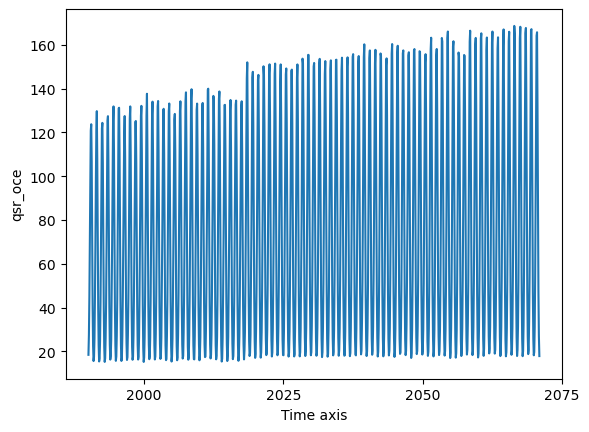

In [8]:
qsr_mean.plot() # the xarray plot function allows us to quickly plot data

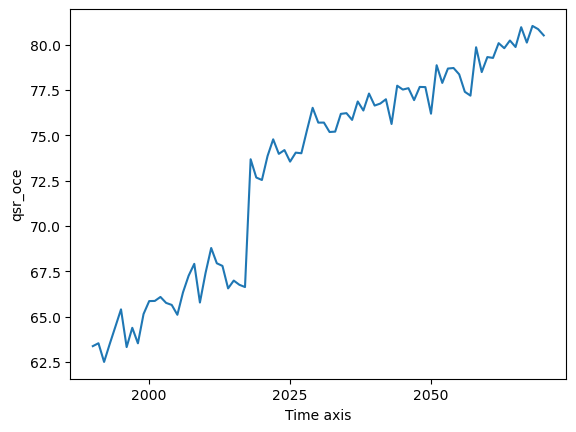

In [9]:
monthly_qsr = qsr_mean.resample(time_counter="YS").mean()
monthly_qsr.plot() # interesting

### ORCA Coordinates
The NEMO model uses an ORCA grid, which has an unorthodox mapping of latitude and longitude.
Let's plot these coordinates...

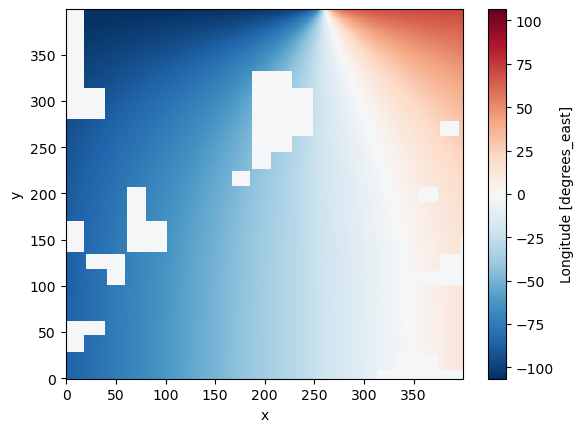

In [10]:
ds.nav_lon.plot()

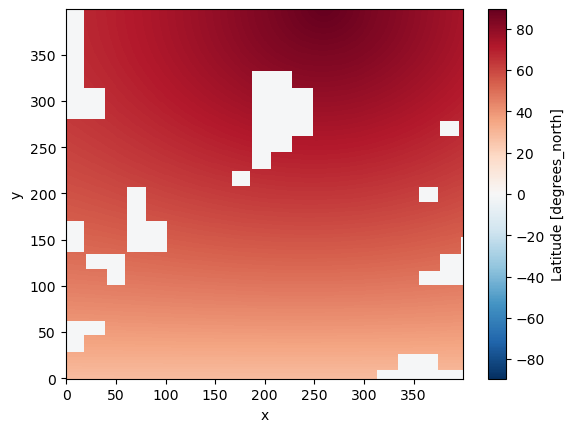

In [11]:
ds.nav_lat.plot()

Coordinate transforms are required to plot on with this tri-polar coordinate system. We now give examples of plotting with and without an appropriate transform. 

In [12]:
# first we select a date
surf_rad_y2000m01 = ds.qsr_oce.sel(time_counter="2000-01")

In [13]:
import cartopy.crs as ccrs # First we introduce Cartopy - a plotting module.
import matplotlib.pyplot as plt # import general plotting module
import cartopy.feature as cfeature

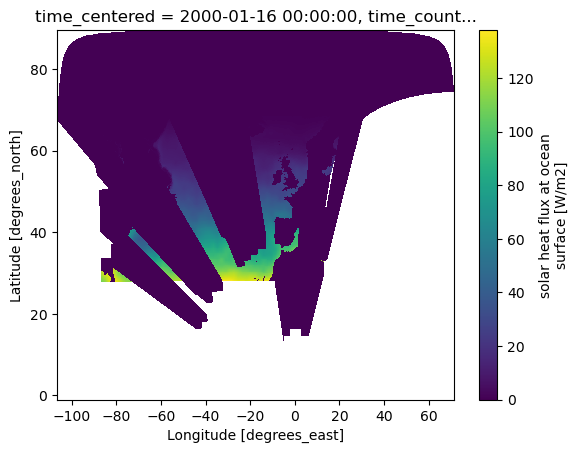

In [14]:
# now we can plot...
surf_rad_y2000m01.plot(x="nav_lon",y="nav_lat")

In [15]:
# the stipes appear due to the need to mask land
# Now extract the land from a file called domain_cfg.nc

dom_cfg = xr.open_dataset(path + "verify.domcfg.nc")

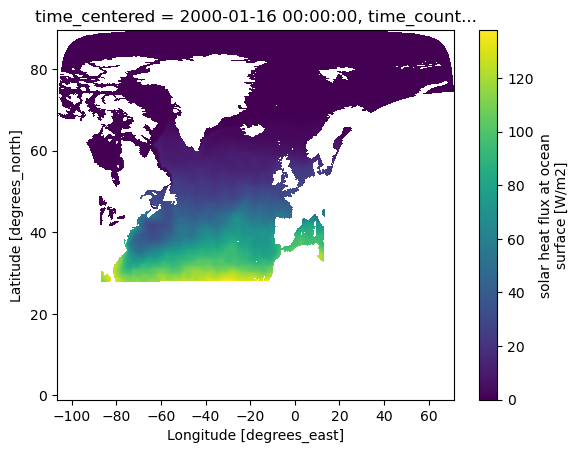

In [16]:
surf_rad_y2000m01 = surf_rad_y2000m01.where(dom_cfg.top_level == 1)
surf_rad_y2000m01.plot(x="nav_lon",y="nav_lat")

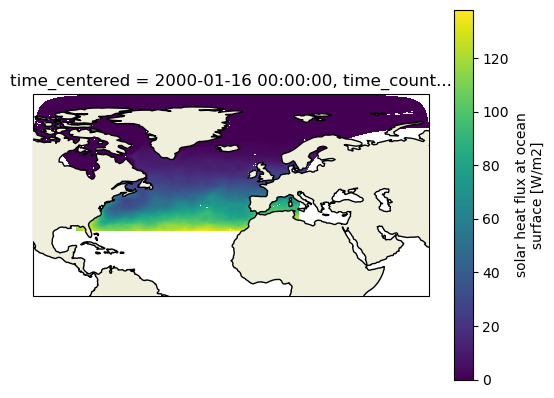

In [17]:
# now let us plot using a transform
ax=plt.subplot(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
surf_rad_y2000m01.plot(ax=ax, x="nav_lon",y="nav_lat", transform=ccrs.PlateCarree())